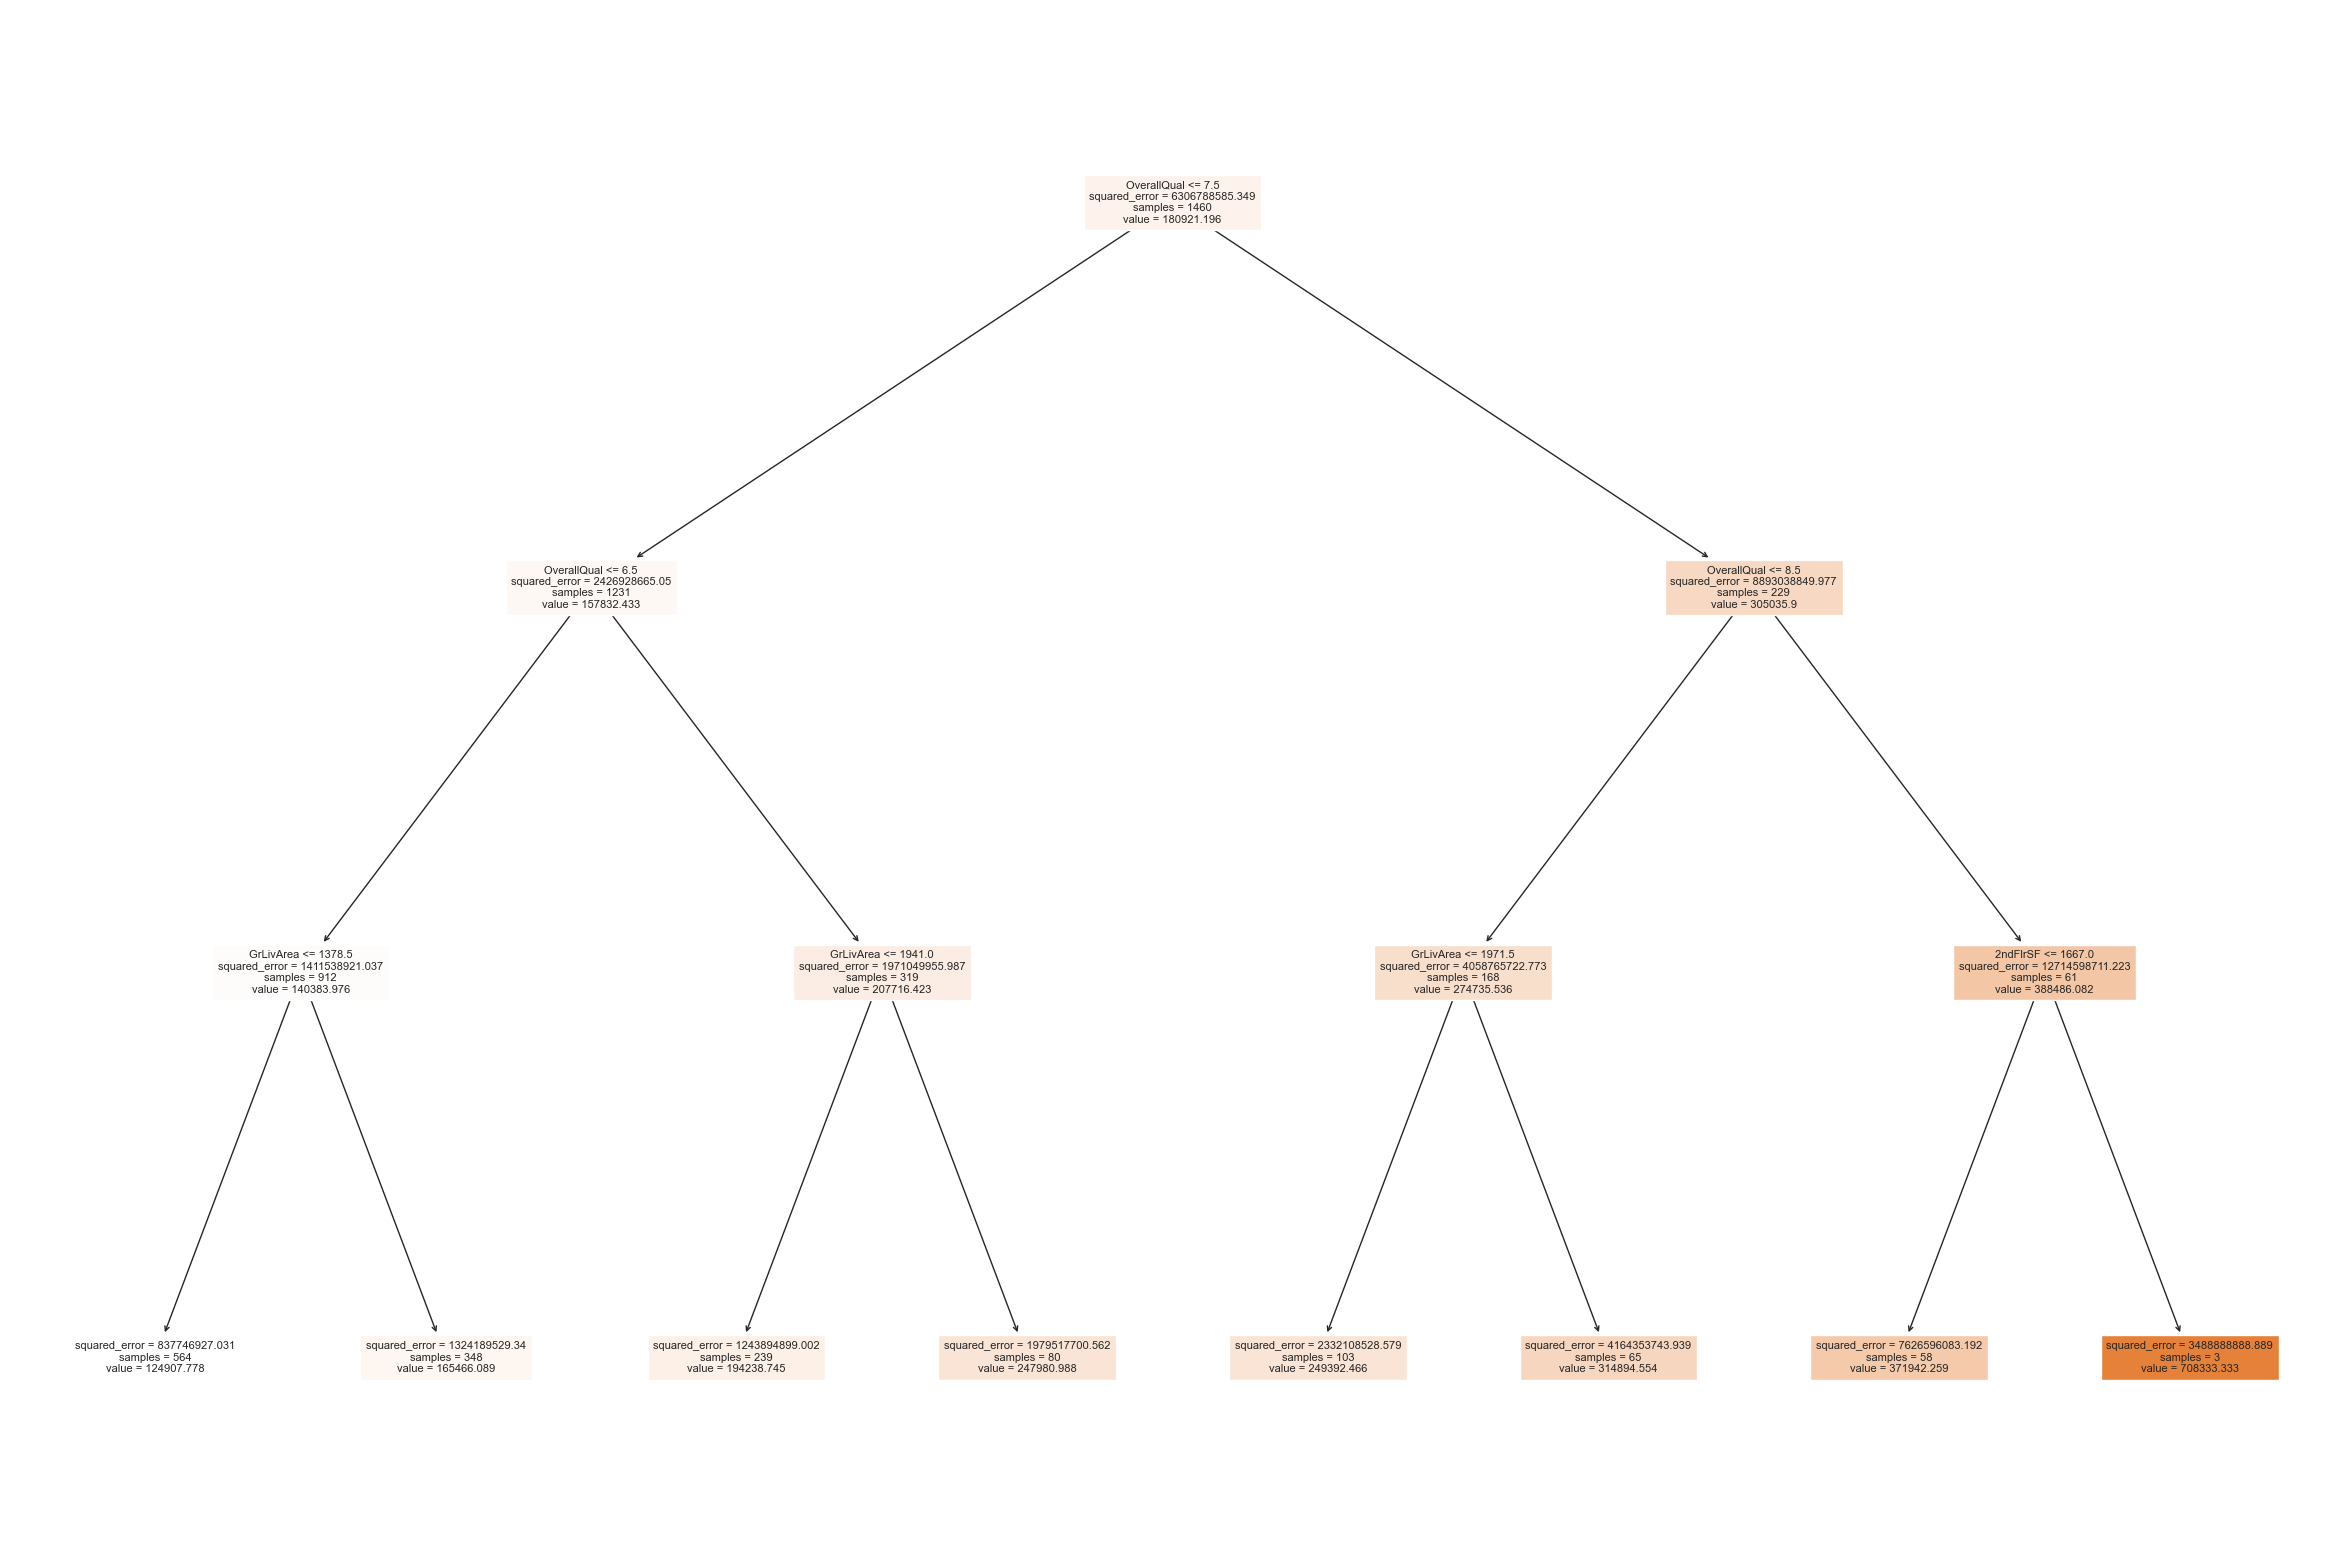

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Chargez les données d'entraînement
train_df = pd.read_csv('C:/users/Dell/PycharmProjects/pythonProject/tp1 fouille/pythonProject/train.csv')

# Prétraitement des données d'entraînement
train_df = train_df.select_dtypes(include=[np.number]).dropna(axis=1)
train_df.fillna(train_df.mean(), inplace=True)

# Divisez les données d'entraînement en variables explicatives (X_train) et cible (y_train)
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Encodez les variables catégorielles
label_encoders = {}
for col in X_train.select_dtypes(include='object'):
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])

# Création et entraînement de l'arbre de décision pour la régression avec une profondeur maximale de 3 niveaux
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

# Structure de l'arbre de décision avec une figure plus grande et une taille de police plus petite
# Structure de l'arbre de décision avec une figure plus grande et une taille de police plus petite
plt.figure(figsize=(30,20))
plot_tree(regressor, filled=True, feature_names=X_train.columns, fontsize=8)
plt.show()
